In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pandas as pd, tarfile
import matplotlib.pyplot as plt
# add our custom modules
import sys
sys.path.append("../") # go to parent dir
from src import main # FIXME this is not working for me (Felix)

ModuleNotFoundError: No module named 'get_data'

## 1. Load data

### Residential data

In [14]:
df = pd.read_csv("../data/residential_load_data_base/USA_OR_Lakeview.AWOS.725976_TMY3_BASE.csv")
#df["date_time"] = pd.to_datetime(df["Date/Time"])

In [16]:
df.drop([col_name for col_name in df.columns if "Electricity" not in col_name], axis=1)

,Electricity:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly)
0,0.928922,0.0,0.0,0.208129,0.208129,0.208129,0.161613,0.035211,0.092943,0.413915
1,0.805783,0.0,0.0,0.216565,0.216565,0.216565,0.094274,0.020540,0.076186,0.381106
2,0.753431,0.0,0.0,0.215295,0.215295,0.215295,0.067339,0.014671,0.062326,0.376688
3,0.740348,0.0,0.0,0.215864,0.215864,0.215864,0.067339,0.014671,0.053976,0.371385
4,0.745437,0.0,0.0,0.223136,0.223136,0.223136,0.067339,0.014671,0.065823,0.357356
...,...,...,...,...,...,...,...,...,...,...
8755,2.156597,0.0,0.0,0.181003,0.181003,0.181003,0.780200,0.169986,0.349591,0.658706
8756,2.059024,0.0,0.0,0.184482,0.184482,0.184482,0.710539,0.154808,0.310730,0.681352
8757,1.895158,0.0,0.0,0.189046,0.189046,0.189046,0.599082,0.130525,0.293949,0.665445
8758,1.565247,0.0,0.0,0.195141,0.195141,0.195141,0.445828,0.097135,0.234174,0.575857


In [5]:
print("Start date:", df.iloc[0]["Date/Time"])
print("End date:  ", df.iloc[-1]["Date/Time"])

Start date:  01/01  01:00:00
End date:    12/31  24:00:00


### Commercial data (no relevant)

In [32]:
with tarfile.open("../data/COMMERCIAL_LOAD_DATA_E_PLUS_OUTPUT.part1.tar.gz") as tf:
    example_file = tf.extractfile("USA_CA_Palmdale.AP.723820_TMY3/RefBldgWarehouseNew2004_7.1_5.0_3B_USA_CA_LOS_ANGELES.csv")
    df = pd.read_csv(example_file)

In [33]:
df.head(4)

,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),Electricity:Facility [kW](Monthly),Gas:Facility [kW](Monthly)
0,01/01 01:00:00,16.895495,1.479671,0.0,0.0,5.481225,1.0116,42.210467,42.210467,NaN,NaN
1,01/01 02:00:00,16.696428,1.280603,0.0,0.0,5.481225,1.0116,36.503110,36.503110,NaN,NaN
2,01/01 03:00:00,17.220737,1.804913,0.0,0.0,5.481225,1.0116,51.598566,51.598566,NaN,NaN
3,01/01 04:00:00,16.837994,1.422169,0.0,0.0,5.481225,1.0116,40.554650,40.554650,NaN,NaN


In [34]:
df.describe()

,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),Electricity:Facility [kW](Monthly),Gas:Facility [kW](Monthly)
count,8760.000000,8760.000000,8760.000000,8760.0,8760.000000,8760.000000,8760.000000,8760.000000,0.0,0.0
mean,28.011977,1.681238,1.287891,0.0,17.283503,3.311257,14.368482,14.368482,NaN,NaN
std,21.622597,1.508122,3.720721,0.0,18.266544,3.418924,23.398543,23.398543,NaN,NaN
min,6.492824,0.000000,0.000000,0.0,5.481225,1.011600,0.000000,0.000000,NaN,NaN
25%,15.415824,0.000000,0.000000,0.0,5.481225,1.011600,0.000000,0.000000,NaN,NaN
50%,16.680451,1.507980,0.000000,0.0,5.481225,1.011600,0.000000,0.000000,NaN,NaN
75%,49.935521,3.474151,0.000000,0.0,38.368572,8.092797,23.119045,23.119045,NaN,NaN
max,81.293148,3.474151,19.383579,0.0,49.331021,9.104397,131.775872,131.775872,NaN,NaN


In [35]:
print("Start date:", df.iloc[0]["Date/Time"])
print("End date:  ", df.iloc[-1]["Date/Time"])

Start date:  01/01  01:00:00
End date:    12/31  24:00:00


In [36]:
# check whether there are cells where one of the last two columns is not NaN
(~df["Electricity:Facility [kW](Monthly)"].isna()).sum(), (~df["Gas:Facility [kW](Monthly)"].isna()).sum()

(0, 0)

We observe that the last two columns, `Electricity:Facility [kW](Monthly)` and `Gas:Facility [kW](Monthly)` are always not filled.

<Axes: >

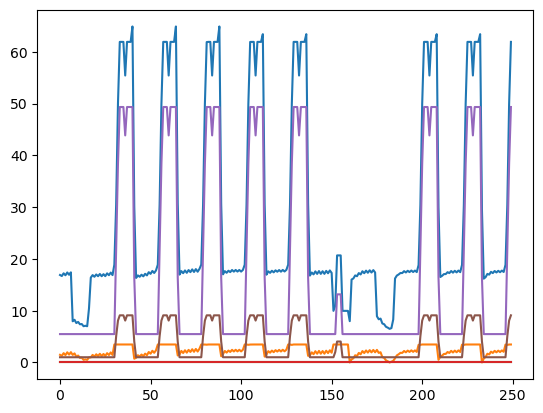

In [37]:
fig, ax = plt.subplots()
T = 250
df["Electricity:Facility [kW](Hourly)"][:T].plot.line(ax=ax)
df["Fans:Electricity [kW](Hourly)"][:T].plot.line(ax=ax)
df["Cooling:Electricity [kW](Hourly)"][:T].plot.line(ax=ax)
df["Heating:Electricity [kW](Hourly)"][:T].plot.line(ax=ax)
df["InteriorLights:Electricity [kW](Hourly)"][:T].plot.line(ax=ax)
df["InteriorEquipment:Electricity [kW](Hourly)"][:T].plot.line(ax=ax)

In [42]:
df["Electricity:Facility [kW](Hourly)"].values.shape[0]

8760

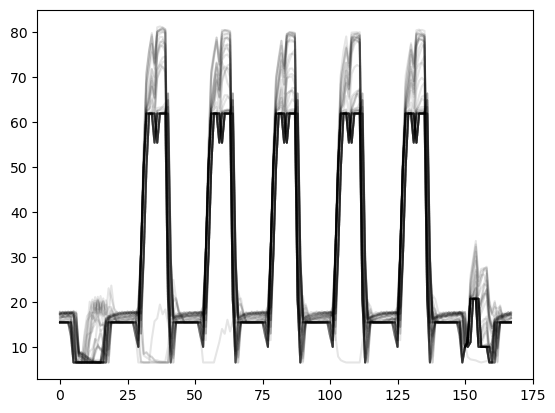

In [21]:
for w in df["Electricity:Facility [kW](Hourly)"].values[:52*24*7].reshape(-1, 24*7):
  plt.plot(w, c="k", alpha=.1)

## 2. Other data

In [21]:
solarirradiance, windspeed, rate_consumption_charge = main.import_data()

In [27]:
solarirradiance.shape, windspeed.shape, rate_consumption_charge.shape

((4319,), (4322,), (4319,))

We observe that the other datasets have different lengths, which we have to deal with.